## Class 10
## Plotting Points data: 311 data 📲 📲 📲 📲 

c4sue 2021 NYU @avigailvantu

Today we will continue to work with Pandas and Matplotlib. We will also create some maps using geopandas. Looking into 311 complaints from the past month and from the same period in 2021 we will compare, group and visualize the city’s trends. Along the way we will create a GeoDataFrame, this is a geographical format that is similar enough to a data frame but has an extra dimension of geographical attributes to it.  Think of the times where we loaded a CSV data into QGIS and needed to merge with a swapfile of assign column to a geographical unit.

This week we will be doing something similar, only with that we will transform a csv (which we will read into a data frame) and then assign columns in the data to represent geometry. That would enable us to then visualize the data quite easily. We’ll some pretty simple, yet cool, ways to do so!

In [11]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
#from shapely.geometry import Point
#from geopandas import GeoDataFrame

For this assignment I downloaded the 311 data from the NYC Open Data platform. I wanted to look into how people in the city complaint patterns were in the past month. In order to get a relative understating we will compare data from 2020 and 2021. Comparing similar periods in between years is a common method in highlighting changes and trends. Thinking about time series, many phenomenas are seasonal. Which is why comparing one month to the previous month is tricky. Having said that, even the same period in two separate years is likely to have some differences, but hopefully less. 


- Data 2020: March 1st - March 31st 2020
- Data 2021: March 1st - March 31st 2021 

* Note: you will need to fetch the data yourself from the NYC Open Data Flatrform 


In [50]:
#load 311 data 1 for this year and one for last year: 
data20 = pd.read_csv('311_March2020.csv')
data21 = pd.read_csv('311_March2021.csv')

#load 2020 data 



/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
data20.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45730477,03/01/2020 12:00:00 AM,03/02/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10468.0,2297 CEDAR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.862225,-73.911159,"(40.86222535202683, -73.91115884964748)"
1,45731855,03/01/2020 12:00:00 AM,03/02/2020 10:19:39 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10458.0,2954 WEBSTER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867391,-73.883392,"(40.867390857417874, -73.8833918894606)"
2,45727718,03/01/2020 12:00:00 AM,03/02/2020 10:37:56 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10468.0,2297 CEDAR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.862225,-73.911159,"(40.86222535202683, -73.91115884964748)"
3,45728413,03/01/2020 12:00:00 AM,03/02/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10128.0,1570 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.780279,-73.952933,"(40.78027896232064, -73.95293321926803)"
4,45731136,03/01/2020 12:00:00 AM,03/09/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11691.0,20-17 MOTT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.604333,-73.753038,"(40.60433339241671, -73.75303800188094)"


In [14]:
data21.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,49892855,03/01/2021 12:00:00 AM,03/01/2021 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10467.0,89 EAST GUN HILL ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.881706,-73.879646,"(40.881706083225524, -73.87964559673972)"
1,49899122,03/01/2021 12:00:00 AM,03/09/2021 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10039.0,7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.823567,-73.937673,"(40.82356703878467, -73.93767317525372)"
2,49897552,03/01/2021 12:00:00 AM,03/01/2021 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11211.0,145 GRAND STREET EXTENSION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710662,-73.954180,"(40.71066163433815, -73.95417991036442)"
3,49898355,03/01/2021 12:00:00 AM,03/08/2021 10:57:21 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,10475.0,2160 BARTOW AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.869329,-73.825126,"(40.86932913143279, -73.8251260589038)"
4,49902850,03/01/2021 12:00:00 AM,03/01/2021 11:04:02 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11211.0,200 NORTH 11 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.718995,-73.953673,"(40.718994526951334, -73.95367274183664)"


In [15]:
print ('shape 2020',data20.shape)
print ('shape 2021',data21.shape)

shape 2020 (153166, 41)
shape 2021 (204771, 41)


### Question 1: 
What are the changes between 2020 and 2021 data in terms of quantities of non emargency complaints in NYC? 

In [16]:
#What are the columns in the data? 
print ('2020 columns:',data20.columns)
print ('2021 columns:',data21.columns)

2020 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')
2021 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Loca

# 311 data for 2020 and 2021 data by agency: 

Let's look into the "value_counts" function. That would return the number of values for each value in the Agencey column. Meaning we will get a list of how many complaints were chanaled into each agency. 

Check out this URL for the agencies acronyms
https://www1.nyc.gov/site/mocs/about/agencies-acronyms-initialisms.page

In [17]:
data20['Agency'].value_counts()

NYPD     57851
HPD      32123
DOT      18268
DEP      10300
DCA       9244
DSNY      7077
DOB       6323
DOHMH     4200
DPR       3952
TLC       1719
DHS       1460
EDC        368
DOE        218
DFTA        43
DOITT       20
Name: Agency, dtype: int64

In [18]:
data21['Agency'].value_counts()

NYPD                                     84312
HPD                                      45077
DSNY                                     17120
DOT                                      17066
DEP                                      12217
DOB                                       6479
DPR                                       6330
DOHMH                                     5443
EDC                                       3261
MAYOR'S OFFICE OF SPECIAL ENFORCEMENT     2989
DCA                                       1524
DHS                                       1481
TLC                                       1408
DOE                                         34
DOITT                                       20
DFTA                                        10
Name: Agency, dtype: int64

### Question 2:

- What are some of the differences in patterns we are seeing in which agencies the calls have been channeled to between 2020 and 2021?  Which agencies have been seeing less activity and which ones more? 

So far we worked mainly with Pandas (also some pyplot, numpy and datetime). In addiition to all these liberals Pyhton also has some pretty neat geographical features! Let's check out a few of them on our data: 

## From DataFrame to GeoDataFrame 🧮

GeoDataFrame is a data frame that includes one column with a "special" status. This column is the "geometry" column which enbales Python to refer to the data as geogpraphical. In many cases, like in our case, we will not have the "geometry" column built-in in the data. Instead, we will usually have x any y or Latitue and Longtitude that we will tranform into the needed format. 

To go from DataFrame---> GeoDataFrame:
- we would want to tell python which columns can be used as "geometry". 

Note that for point type data a typical geometry columns looks like this


- POINT (LON LAT) 

The point() format will be created using the GeoDataFrame function. We will only need to tell Python which columns in the data are which (lon, lat).  


In [20]:
#transform data into geo data frame: 


#one geodata frame for 2020 
gdf20 = gpd.GeoDataFrame(
    data20, geometry=gpd.points_from_xy(data20.Longitude, data20.Latitude))

#and another one for 2021 
gdf21 = gpd.GeoDataFrame(
    data21, geometry=gpd.points_from_xy(data21.Longitude, data21.Latitude))

#note that here we tell Python that the column: 
#data20.Longitude is the longtitute and data20.Latitude is the latitude. 

In [23]:
#DataFrame

data20.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,45730477,03/01/2020 12:00:00 AM,03/02/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10468.0,2297 CEDAR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.862225,-73.911159,"(40.86222535202683, -73.91115884964748)",POINT (-73.91116 40.86223)
1,45731855,03/01/2020 12:00:00 AM,03/02/2020 10:19:39 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10458.0,2954 WEBSTER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.867391,-73.883392,"(40.867390857417874, -73.8833918894606)",POINT (-73.88339 40.86739)
2,45727718,03/01/2020 12:00:00 AM,03/02/2020 10:37:56 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10468.0,2297 CEDAR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.862225,-73.911159,"(40.86222535202683, -73.91115884964748)",POINT (-73.91116 40.86223)
3,45728413,03/01/2020 12:00:00 AM,03/02/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10128.0,1570 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.780279,-73.952933,"(40.78027896232064, -73.95293321926803)",POINT (-73.95293 40.78028)
4,45731136,03/01/2020 12:00:00 AM,03/09/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11691.0,20-17 MOTT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.604333,-73.753038,"(40.60433339241671, -73.75303800188094)",POINT (-73.75304 40.60433)


In [24]:
# and GeoDataFrame
#check out our GeoDataFrame--> note the "geometry" column was added (all the way to the right)
gdf20.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,45730477,03/01/2020 12:00:00 AM,03/02/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10468.0,2297 CEDAR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.862225,-73.911159,"(40.86222535202683, -73.91115884964748)",POINT (-73.91116 40.86223)
1,45731855,03/01/2020 12:00:00 AM,03/02/2020 10:19:39 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10458.0,2954 WEBSTER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.867391,-73.883392,"(40.867390857417874, -73.8833918894606)",POINT (-73.88339 40.86739)
2,45727718,03/01/2020 12:00:00 AM,03/02/2020 10:37:56 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10468.0,2297 CEDAR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.862225,-73.911159,"(40.86222535202683, -73.91115884964748)",POINT (-73.91116 40.86223)


In [25]:
#check the shape of the data: 

gdf20.shape

(153166, 42)

In [26]:
gdf21.shape

(204771, 42)

## Now we can fianly visualize the data: 

First: plot all points for the layer, not I am setting the marker zise on 0.3 since there are so many of them!! 

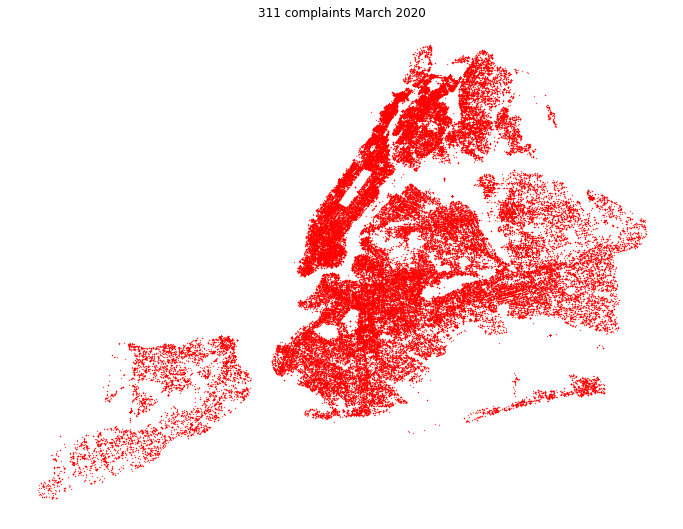

In [27]:
#plot all 2020 data:
gdf20.plot( color='red',legend=True,figsize=(12, 12),markersize=0.1)
plt.axis('off')
plt.title('311 complaints March 2020')
plt.show()

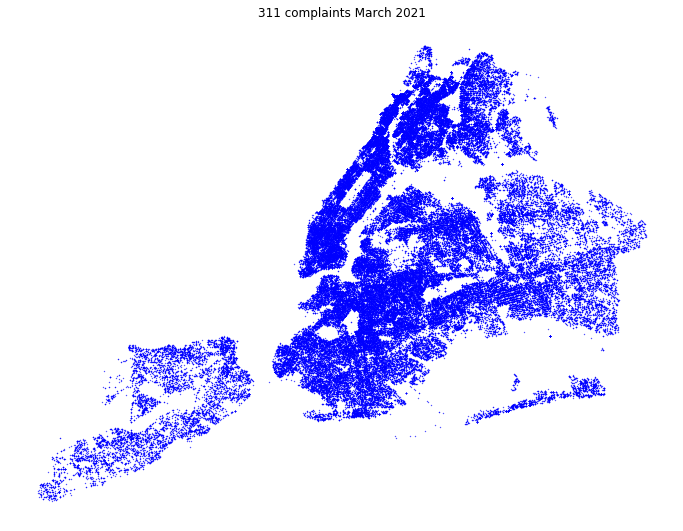

In [51]:
#plot all 2020 data: 
gdf21.plot( color='blue',legend=True,figsize=(12, 12),markersize=0.1)
plt.axis('off')
plt.title('311 complaints March 2021')
plt.show()

# Exmine one agency: 
### HPD (Housing Preservation & Development)

In order to make better sense of what are people reporting less in these past weeks, we will take a closer look at the different agencies complaints. 

We will start with HPD: 

In [29]:
#filter only hpd

hpd20 = gdf20.loc[gdf20['Agency']=='HPD']

hpd21 = gdf21.loc[gdf21['Agency']=='HPD']

In [31]:
print (len(hpd20))
print (len(hpd21))

32123
45077


## Plot HPD data for both 2020 and 2021

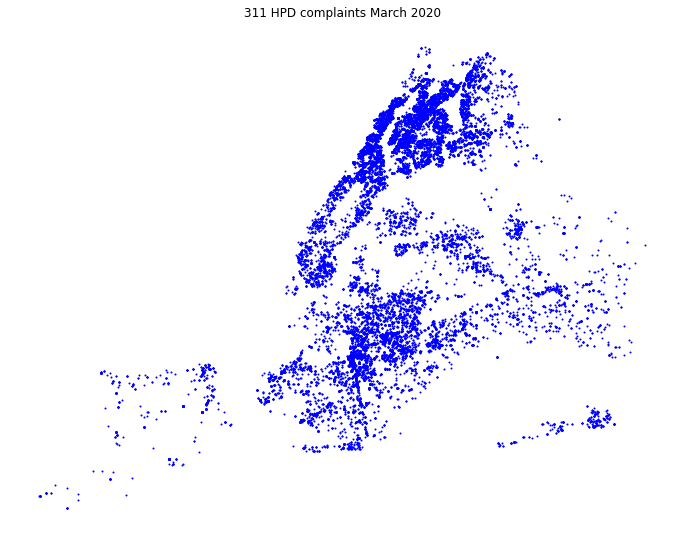

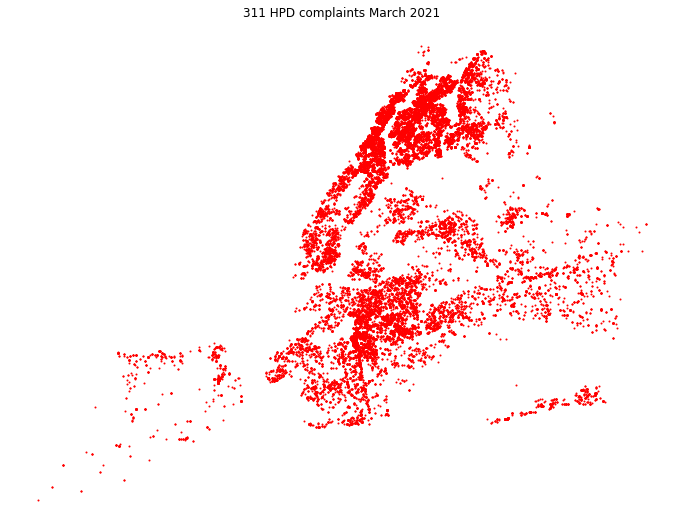

In [32]:
hpd20.plot( color='blue',legend=True,figsize=(12, 12), markersize=1)
plt.axis('off')
plt.title('311 HPD complaints March 2020')
hpd21.plot( color='red',legend=True,figsize=(12, 12),markersize=1)
plt.axis('off')
plt.title('311 HPD complaints March 2021')
plt.show()

## Question 3
Which areas seem to have more or less HPD complaints between March 2020 and March 2021?
 
## Another way for us to look into the data is to sub-slice it again: 

Now dive into the complaint types in the HPD complaints. So we can learn what are the types of housing complaint we are seeing. that would also help us compare what were some of the changes b/w both periods

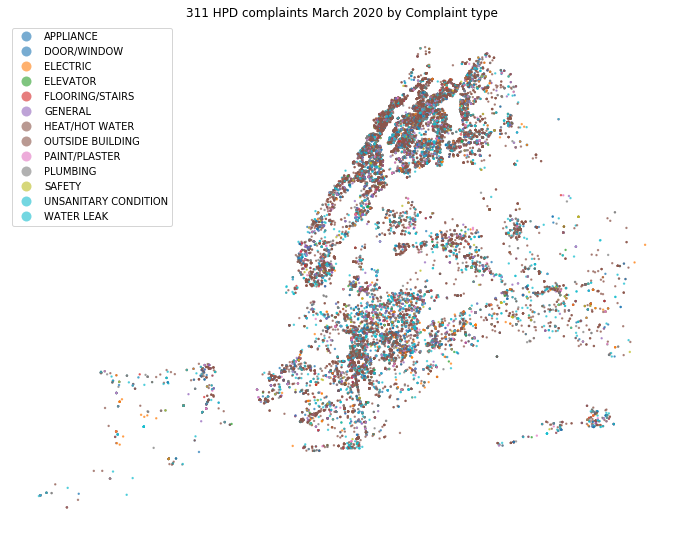

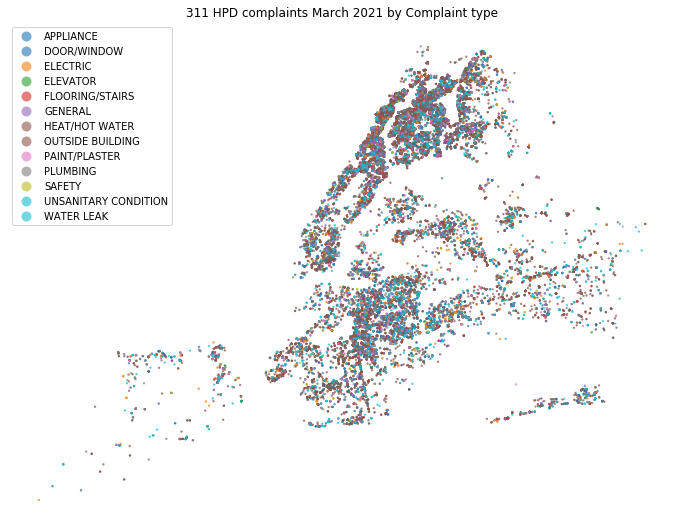

In [33]:
#plot hpd by complaint type:

#1. for 2020
ax = hpd20.plot(column='Complaint Type',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints March 2020 by Complaint type')
plt.axis('off')
plt.show()


#2. for 2020 
ax = hpd21.plot(column='Complaint Type',legend=True,figsize=(12, 12),alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints March 2021 by Complaint type')
plt.axis('off')
plt.show()

## Question 4: 

What information can we take away from these two maps? 

# Another way to look into the complaint types: 
On top of visualizng the data we can also look into the number of complaints of each type. An easy way to do so is to use the Group.by command. This is a pretty timple command that has a lot of options (more about it on other classes!). 

The main thing to know about group.by right now is that group.by operates on a dataframe so that it basically does 3 main things: 

1. Split : take the data and splits it according to the grouping condition 
2. Apply: calculates what we want it to do: sum, means count etc
3. Combine: it combines the data into new groups 




In [35]:
hpd20['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'APPLIANCE', 'WATER LEAK', 'PLUMBING',
       'PAINT/PLASTER', 'DOOR/WINDOW', 'GENERAL', 'ELECTRIC',
       'FLOORING/STAIRS', 'UNSANITARY CONDITION', 'SAFETY', 'ELEVATOR',
       'OUTSIDE BUILDING'], dtype=object)

In [36]:
len(hpd20)

32123

In [37]:
len(hpd21)

45077

In our case we will count group by complaint type so that: Python will Split the data according to each type of complaint (hot water, windows etc). Then it will Apply, meaning it would count how many of each compliant type the data has. Finally, Python will Combine the new grouped data. So in our case that would be number of complaints per each complaint type. Note that by doing so, our data frame structure will changes completely so that each row will represent a complaint type, and the data in the cells will be the count of how many of them are there in our data.  All that in one line of code :-) 

In [39]:
#group.by hpd complaints 

#1. for 2019
hpd20_count_type = hpd20.groupby(['Complaint Type']).count()
#1. for 2020
hpd21_count_type = hpd21.groupby(['Complaint Type']).count()

In [40]:
#look at out new data for 2019 
hpd20_count_type.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,799,799,789,799,799,799,799,799,799,799,...,0,0,0,0,0,0,799,799,799,799
DOOR/WINDOW,1517,1517,1502,1517,1517,1517,1517,1517,1517,1517,...,0,0,0,0,0,0,1517,1517,1517,1517
ELECTRIC,996,996,994,996,996,996,996,996,996,996,...,0,0,0,0,0,0,996,996,996,996
ELEVATOR,115,115,115,115,115,115,115,115,115,115,...,0,0,0,0,0,0,115,115,115,115
FLOORING/STAIRS,895,895,890,895,895,895,895,895,895,895,...,0,0,0,0,0,0,895,895,895,895
GENERAL,1343,1343,1335,1343,1343,1343,1343,1343,1343,1343,...,0,0,0,0,0,0,1343,1343,1343,1343
HEAT/HOT WATER,16344,16344,16314,16344,16344,16344,16344,16342,16344,16344,...,0,0,0,0,0,0,16342,16342,16342,16344
OUTSIDE BUILDING,36,36,35,36,36,36,36,36,36,36,...,0,0,0,0,0,0,36,36,36,36
PAINT/PLASTER,1970,1970,1958,1970,1970,1970,1970,1968,1970,1970,...,0,0,0,0,0,0,1968,1968,1968,1970


In [41]:
#and for 2020
hpd21_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,1200,1200,906,1200,1200,1200,1200,1199,1200,1200,...,0,0,0,0,0,0,1199,1199,1199,1200
DOOR/WINDOW,2763,2763,2150,2763,2763,2763,2763,2763,2763,2763,...,0,0,0,0,0,0,2763,2763,2763,2763
ELECTRIC,1556,1556,1228,1556,1556,1556,1556,1554,1556,1556,...,0,0,0,0,0,0,1554,1554,1554,1556
ELEVATOR,146,146,54,146,146,146,146,146,146,146,...,0,0,0,0,0,0,146,146,146,146
FLOORING/STAIRS,1813,1813,1483,1813,1813,1813,1813,1813,1813,1813,...,0,0,0,0,0,0,1813,1813,1813,1813


In [42]:
#because the all columns look the same we will remove them and only keep the first one

hpd20_count_type = hpd20_count_type['Unique Key']
hpd21_count_type = hpd21_count_type['Unique Key']


In [43]:
hpd20_count_type.head(10)

Complaint Type
APPLIANCE             799
DOOR/WINDOW          1517
ELECTRIC              996
ELEVATOR              115
FLOORING/STAIRS       895
GENERAL              1343
HEAT/HOT WATER      16344
OUTSIDE BUILDING       36
PAINT/PLASTER        1970
PLUMBING             2815
Name: Unique Key, dtype: int64

In [44]:
#now let's see the most common HPD complaints for both March/April 2020 and 2021:

# sort data 

hpd20_count_type = hpd20_count_type.sort_values()

hpd21_count_type = hpd21_count_type.sort_values()

In [49]:
#5 most common complaints in 2020 were: 
hpd20_count_type.head(5)

Complaint Type
OUTSIDE BUILDING     36
ELEVATOR            115
SAFETY              479
APPLIANCE           799
FLOORING/STAIRS     895
Name: Unique Key, dtype: int64

In [48]:

#5 most common complaints in 2021  were: 
hpd21_count_type.head(5)

Complaint Type
OUTSIDE BUILDING      51
ELEVATOR             146
SAFETY               547
APPLIANCE           1200
ELECTRIC            1556
Name: Unique Key, dtype: int64

## Assignment:

Your turn: 

So far we worked on the HPD data. 

We will now divide into groups, when each group will look into another agency complaints: 

# Group 1: NYPD
# Group 2: DOT 
# Group 3: DEP 
# Group 4: DSNY 
# Group 5: DOHMH 

For each groups: 

1. Please filter the subset of the data that has *YOUR* Agencey name
2. Plot, summarize and group.by the data for both 2020 and 2021 
 
Deliver:  
- a. What are the patterns in *YOUR* agency complaints between the 2020 and 2021 data? 
- b. What are some geogrpaphical patterns you are seeing comparing both years?

In class: present your main findings. For you homework: submit your jupyter notebook. In addition on your NYU classes submissions write a short summary of your findings. 



In [ ]:
#your code... 